In [5]:
import os
import pickle
import numpy as np
import pandas as pd
import numpy.linalg as npla
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from collections import deque
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet ,LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, mean_squared_error, zero_one_loss
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score,GridSearchCV, RandomizedSearchCV, cross_val_score

%matplotlib inline


In [6]:
climate_data=pd.read_csv('climate.csv')
X = climate_data.iloc[:,2:20].values
y = climate_data['outcome'].values

# Splitting the dataset in 25% train and test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [7]:
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

In [8]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
x_pca = pca.transform(scaled_data)

In [10]:
scaled_data.shape

(540, 18)

In [11]:
x_pca.shape

(540, 2)

Text(0,0.5,'Second Principal Component')

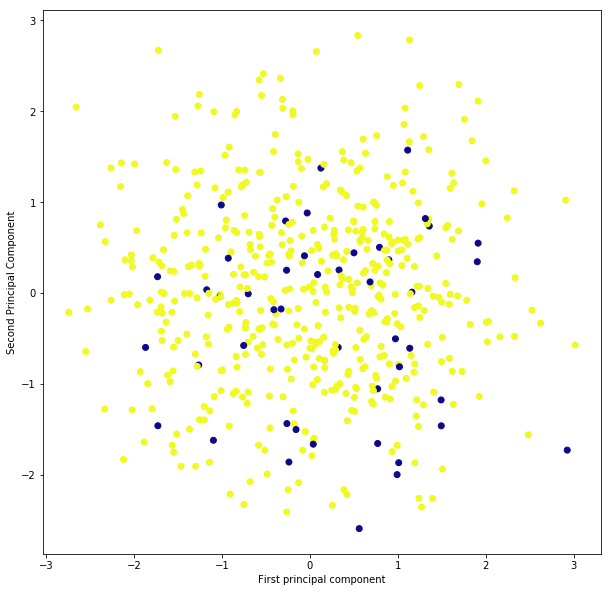

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1],c=climate_data['outcome'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

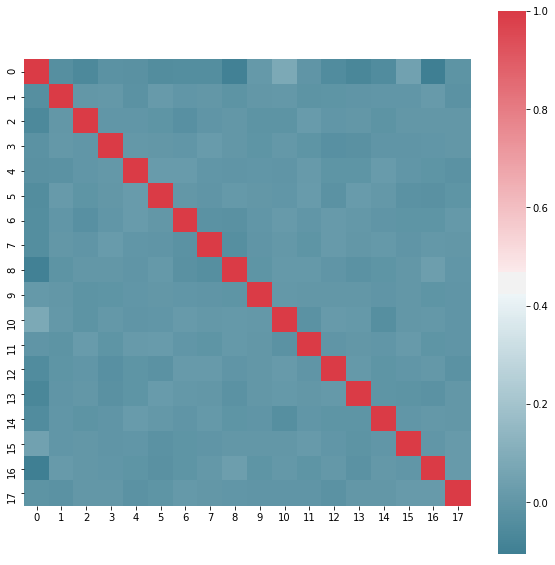

In [13]:
## correlation 
df1 = pd.DataFrame(X)

corr = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)